# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Kharisma Ayuningtyas]
- **Email:** [kharismaayuningtyas@student.ppns.ac.id]
- **ID Dicoding:** [kharisma_ayuningtyas]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada jam berapa jumlah peminjaman sepeda mengalami kenaikan signifikan dalam sehari?
- Pertanyaan 2: Bagaimana pengaruh faktor cuaca terhadap jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Pengambilan dataset hour.csv. Kode di bawah akan menampilkan 5 baris pertama dari DataFrame hour_df.

In [2]:
hour_df = pd.read_csv('https://drive.google.com/uc?id=1S-RWuNE2OlR37CWk7ia9D9aiS7ZJwNDp')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pengambilan dataset day.csv. Kode di bawah akan menampilkan 5 baris pertama dari DataFrame day_df.

In [3]:
day_df = pd.read_csv('https://drive.google.com/uc?id=1L9RJ_NFBawhkmRIwBS7OnE0Q7GEL3iEk')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset berhasil diambil dan dimuat ke dalam DataFrame. Lanjut proses Assessing Data.

### Assessing Data

Menampilkan informasi ringkas tentang hour_df.Untuk  memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df.

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak ada missing data atau null pada hour_df. Namun, tipe data dteday masih object.


In [5]:
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data pada hour_df.

 Menampilkan ringkasan statistik untuk memahami distribusi data seperti rata-rata, nilai minimum, maksimum, dan standar deviasi

In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menampilkan informasi ringkas tentang day_df. Untuk  memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df.

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada missing data atau null pada day_df. Namun, tipe data dteday masih object.

In [8]:
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data pada day_df

Menampilkan ringkasan statistik untuk memahami distribusi data seperti rata-rata, nilai minimum, maksimum, dan standar deviasi

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
-  Tidak ada missing value, data kosong, dan data duplikasi dari dataset tersebut.

### Cleaning Data

Maka kita ganti tipe data dteday pada hour_df ke datatime.

In [10]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Maka kita ganti tipe data dteday pada day_df ke datatime.

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Memeriksa kembali, data duplikasi, missing value, dan data kosong

In [12]:
duplicated_hour_df = hour_df.duplicated().sum()
duplicated_day_df = day_df.duplicated().sum()

print(f"\nJumlah duplikasi di hour_df: {duplicated_hour_df}")
print(f"Jumlah duplikasi di day_df: {duplicated_day_df}")


Jumlah duplikasi di hour_df: 0
Jumlah duplikasi di day_df: 0


In [13]:
missing_hour_df = hour_df.isnull().sum()
missing_day_df = day_df.isnull().sum()

print(f"Jumlah nilai yang hilang di hour_df:\n{missing_hour_df}")
print(f"\nJumlah nilai yang hilang di day_df:\n{missing_day_df}")

Jumlah nilai yang hilang di hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai yang hilang di day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value, data kosong, dan data duplikasi dari dataset tersebut.

Mengganti nama kolom dilakukan agar lebih mudah dipahami. 'dteday' menjadi 'date', 'hr' menjadi 'hour', 'cnt' menjadi 'count', 'hum' menjadi 'humidity', 'temp' menjadi 'temperature', 'weathersit'menjadi 'weather'.

In [14]:
hour_df.rename(columns={
    'dteday': 'date',
    'hr': 'hour',
    'cnt': 'count',
    'hum': 'humidity',
    'temp': 'temperature',
    'weathersit': 'weather'
}, inplace=True)

In [15]:
day_df.rename(columns={
    'dteday': 'date',
    'cnt': 'count',
    'hum': 'humidity',
    'temp': 'temperature',
    'weathersit': 'weather'
}, inplace=True)

**Insight:**
- Tidak ada masalah pada data.
- Nama kolom diubah agar mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore gabungan

Dataset hour dan day digabung.

In [16]:
all_df = pd.merge(
    left=hour_df,         # Tabel pertama (data per jam)
    right=day_df,         # Tabel kedua (data per hari)
    how="inner",           # Tipe penggabungan
    left_on="date",        # Kunci dari tabel pertama
    right_on="date"        # Kunci dari tabel kedua
)

In [17]:
print("merge data:")

merge data:


In [27]:
all_df.describe()

,instant_x,date,season_x,yr_x,mnth_x,hour,holiday_x,weekday_x,workingday_x,weather_x,...,weekday_y,workingday_y,weather_y,temperature_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


Melihat informasi pada all_df untuk memeriksa kembali tampilan data.

In [19]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant_x      17379 non-null  int64         
 1   date           17379 non-null  datetime64[ns]
 2   season_x       17379 non-null  int64         
 3   yr_x           17379 non-null  int64         
 4   mnth_x         17379 non-null  int64         
 5   hour           17379 non-null  int64         
 6   holiday_x      17379 non-null  int64         
 7   weekday_x      17379 non-null  int64         
 8   workingday_x   17379 non-null  int64         
 9   weather_x      17379 non-null  int64         
 10  temperature_x  17379 non-null  float64       
 11  atemp_x        17379 non-null  float64       
 12  humidity_x     17379 non-null  float64       
 13  windspeed_x    17379 non-null  float64       
 14  casual_x       17379 non-null  int64         
 15  registered_x   1737

1. Menghitung total penyewaan berdasarkan jam.

In [20]:
hourly_usage = all_df.groupby("hour").agg({"count_x": "sum"}).reset_index()
hourly_usage = hourly_usage.rename(columns={"count_x": "total_usage"})

In [21]:
print("\nPenyewaan Sepeda Berdasarkan Jam:")
print(hourly_usage)


Penyewaan Sepeda Berdasarkan Jam:
    hour  total_usage
0      0        39130
1      1        24164
2      2        16352
3      3         8174
4      4         4428
5      5        14261
6      6        55132
7      7       154171
8      8       261001
9      9       159438
10    10       126257
11    11       151320
12    12       184414
13    13       184919
14    14       175652
15    15       183149
16    16       227748
17    17       336860
18    18       309772
19    19       226789
20    20       164550
21    21       125445
22    22        95612
23    23        63941


2. Menghitung rata-rata penyewaan berdasarkan kondisi cuaca.

In [22]:
weathereffect = all_df.groupby("weather_x").agg({"count_x": "mean"}).reset_index()
weathereffect = weathereffect.rename(columns={"count_x": "average_usage"})

In [23]:
print("\nPengaruh Kondisi Cuaca terhadap Penyewaan Sepeda:")
print(weathereffect)


Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda:
   weather_x  average_usage
0          1     204.869272
1          2     175.165493
2          3     111.579281
3          4      74.333333


**Insight:**
- Penyewaan mencapai puncaknya pada pukul 8 pagi dan 5 sore dan cenderung rendah pada dini hari atau pada pukul 00.00 - 05.00.
- Penyewaan sepeda tertinggi saat cuaca cerah(1), dan menurun saat mulai mendung(2) dst.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa jumlah peminjaman sepeda mengalami kenaikan signifikan dalam sehari?

<ipython-input-24-023845823e5a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=hourly_usage, x="hour", y="total_usage", palette="viridis", marker="o")


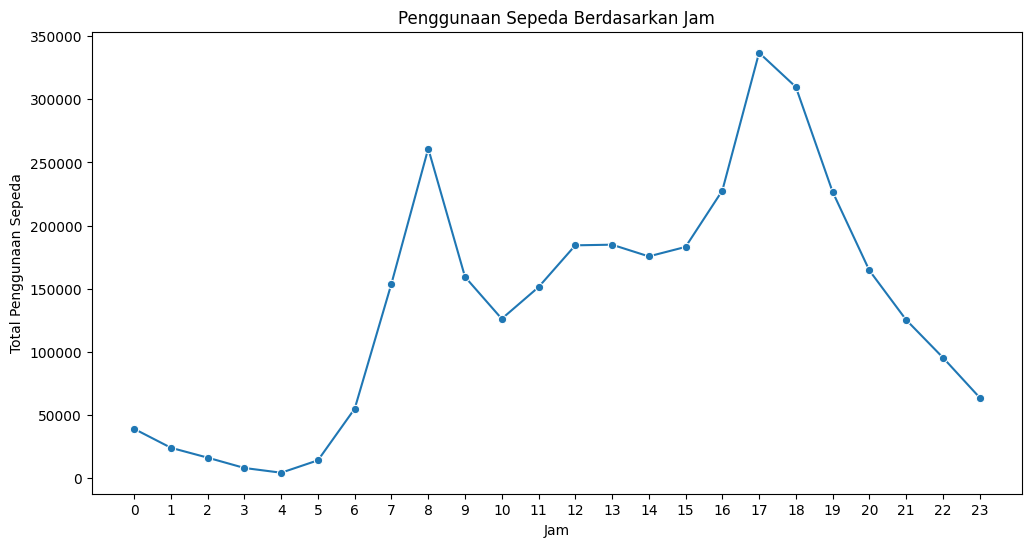

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_usage, x="hour", y="total_usage", palette="viridis", marker="o")
plt.title("Penggunaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Total Penggunaan Sepeda")
plt.xticks(range(0, 24))
plt.show()

### Pertanyaan 2: Bagaimana pengaruh faktor cuaca terhadap jumlah penyewa sepeda?

<ipython-input-25-9224ea1fe4de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weathereffect, x="weather_x", y="average_usage", palette="coolwarm")


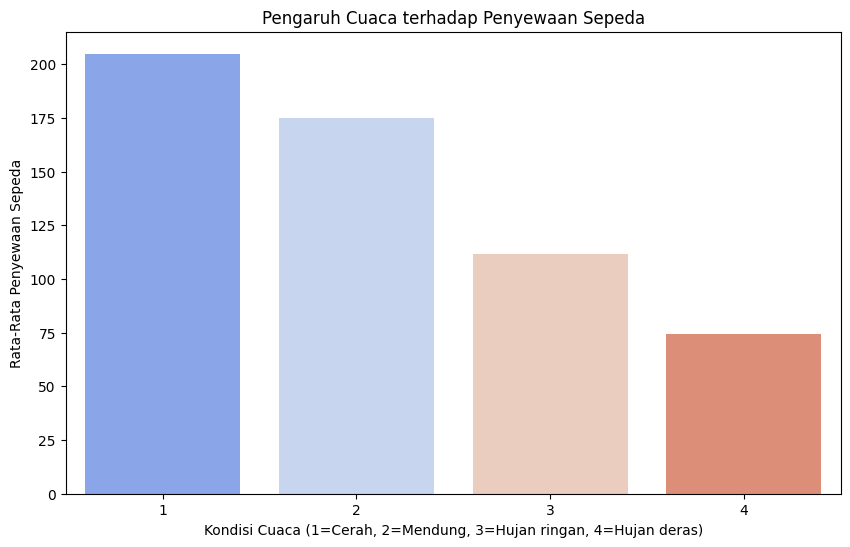

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=weathereffect, x="weather_x", y="average_usage", palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan ringan, 4=Hujan deras)")
plt.ylabel("Rata-Rata Penyewaan Sepeda")
plt.show()

**Insight:**
- Penyewaan sepeda mencapai puncak pada jam sibuk pagi hari, pukul 07.00 - 09.00 dan sore hari, pukul 16.00 - 18.00. Hal ini menunjukkan penggunaannya dominan untuk aktivitas harian seperti pergi dan pulang kerja.
-Cuaca cerah adalah penyewaan sepeda tertinggi, diikuti oleh cuaca mendung. Penyewaan menurun signifikan pada kondisi hujan ringan dan paling rendah saat hujan deras. Hal ini menunjukkan bahwa kondisi cuaca sangat memengaruhi kenyamanan dan minat pengguna dalam menyewa sepeda.

In [26]:
all_df.to_csv("all_data.csv", index=False)

Menyimpan berkas data yang telah dibersihkan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan jamnya, penyewaan sepeda cenderung rendah pada dini hari, yaitu antara 00.00 - 05.00 karena minimnya aktivitas pengguna. Meningkat signifikan mulai pukul 7 pagi, mencapai puncak pada jam sibuk, yaitu jam 08.00 - 17.00 kemungkinan aktivitas seperti pergi dan pulang kerja, sehingga banyak yang membutuhkan jasa penyewaan sepeda.
- Conclution pertanyaan 2: Cuaca cerah membuat penyewaan sepeda sangat tinggi krena kemungkinan pengguna lebih nyaman bersepeda saat cuaca cerah. Sementara cuaca mendung menurunkan jumlah pengguna, tapi tidak drastis. Kondisi hujan ringan dan hujan deras menyebabkan penurunan signifikan dalam penyewaan.